In [5]:
import numpy as np
from scipy.optimize import fsolve

% matplotlib inline
import time
import pylab as pl
from IPython import display

# PSl – Power of solar radiation arriving to the Earth (short wave radiation)
# Pz – Power of radiation emitted from Earth (long wave radiation)
# A – mean albedo of the Earth surface
# S – solar constant
# PowZ – area of the Earth
# sbc -Stefan-Boltzmann constant

# PSl = S * (PowZ/4) *(1 - A)
# Pz = sbc * (T**4) * PowZ
# Pz = PSl

# sbc * (T**4) * PowZ = S * (PowZ/4) *(1 - A)
# (T**4) = (S * (PowZ/4) * (1 - A))/(sbc*PowZ) = (S * (1 - A))/(4 * sbc)


In [6]:
# Diagram methods


def doPlot(x, y, col):
    pl.plot(x, y, col, markersize=3)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.1)


def setRanges():
    pl.xlim(S_range_left * 0.95, S_range_right * 1.05)
    pl.ylim(-80, 40)
    pl.xlabel('Fraction of solar constant value')
    pl.ylabel('Mean temperature in Celsius degrees')
    pl.title('Glacial-interglacial transition')


def changeColor(i, val):
    if i >= val:
        return 'b+'
    else:
        return 'ro'


# Computation methods

def k_to_c(k):
    return k - 273.15

# No atmosphere methods


def withoutAtmosphere(S, A, sbc):
    return pow((S * (1 - A)) / (4 * sbc), 0.25)

# Taking atmosphere methods


def withAtmosphereEquations(p):
    Ts, Ta = p
    e1 = (-sw_ta) * (1 - sw_as) * S / 4 + c * (Ts - Ta) + sbc * (Ts ** 4) * (1 - lw_aa) - sbc * (Ta ** 4)
    e2 = -(1 - sw_aa - sw_ta + sw_as * sw_ta) * S / 4 - c * (Ts - Ta) - sbc * (Ts ** 4) * (
            1 - lw_ta - lw_aa) + 2 * sbc * (Ta ** 4)
    return e1, e2


def withAtmosphere():
    return fsolve(withAtmosphereEquations, (0.0, 0.0))


def changeAs(t):
    if (t < Tc):
        return sw_as_init_r
    else:
        return sw_as_init


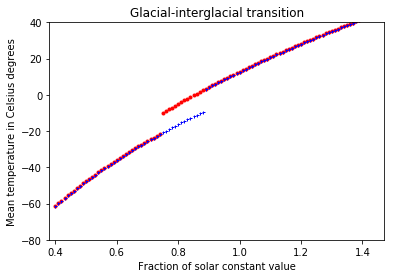

S: 1898.7400000000014 TaC: -3.655760625368373 TsC: 41.16394457717615 Ta: 269.4942393746316 Ts: 314.31394457717613
sp1_val: 1024.5000000000005 W/m^2 sp1_frac: 0.7500000000000003 temp1: -10.002138452479073
sp2_val: 1188.4200000000005 W/m^2 sp2_frac: 0.8700000000000004 temp2: -10.051220857400494


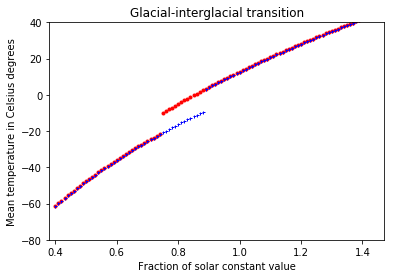

In [9]:
# Variable initiation

# PSl = 0.0
# Pz = 0.0
A = 0.3
S_init = 1366.0  # W/m 2
S = S_init  # W/m 2
# PowZ = 0.0
sbc = 5.67 * pow(10.0, -8)  # W/m^2*K^4

# Short-wave radiation
sw_as_init = 0.19
sw_as_init_r = 0.65
sw_as = sw_as_init
sw_ta = 0.53
sw_aa = 0.30

# Long-wave radiation
lw_ta = 0.06
lw_aa = 0.31

c = 2.7  # Wm^-2 K^-1

# S in range 0.8 to 1.2 S
S_range_left = 0.4
S_range_right = 1.4
S_range_step = 0.01

Tc = -10  # C degrees 

# No atmosphere 
T = withoutAtmosphere(S, A, sbc)
print("No atmosphere in Celsius degrees: " + str(k_to_c(T)) + ".")

# Taking atmosphere 
Ts, Ta = withAtmosphere()
print("Mean temperature of the atmosphere in Celsius degrees  " + str(k_to_c(Ta)) + ".")
print("Mean surface temperature in Celsius degrees  " + str(k_to_c(Ts)) + ".")

setRanges()

arr = list(np.arange(S_range_left, S_range_right, S_range_step))
iterator = list(arr)
iterator.reverse()
iterator.extend(arr)

sp1_val = None
sp2_val = None
sp1_frac = None
sp2_frac = None
sp1_temp = None
sp2_temp = None

# Main loop
for i in range(len(iterator)):
    S = iterator[i] * S_init
    Ts, Ta = withAtmosphere()
    TaC = k_to_c(Ta)
    TsC = k_to_c(Ts)
    sw_as = changeAs(TsC)

    if (sw_as != sw_as_init) and (sp1_val is None):
        sp1_val = S
        sp1_frac = iterator[i]
        sp1_temp = TsC

    if sw_as != sw_as_init:
        sp2_val = S
        sp2_frac = iterator[i]
        sp2_temp = TsC

    col = changeColor(i, len(iterator) / 2)
    doPlot(iterator[i], TsC, col)
    print("S: " + str(S) + " TaC: " + str(TaC) + " TsC: " + str(TsC) + " Ta: " + str(Ta) + " Ts: " + str(Ts))

print("sp1_val: " + str(sp1_val) + " W/m^2 sp1_frac: " + str(sp1_frac) + " temp1: " + str(sp1_temp))
print("sp2_val: " + str(sp2_val) + " W/m^2 sp2_frac: " + str(sp2_frac) + " temp2: " + str(sp2_temp))
